In [1]:
# imports the dependencies
from __future__ import absolute_import, division, print_function

import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

import nltk
import gensim.models.word2vec as w2v
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE


c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suraprak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraprak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
book_filenames = sorted(glob.glob("C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data/*.txt"))

In [7]:
print("Found Books : ")
book_filenames

Found Books : 


['C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\\got1.txt',
 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\\got2.txt',
 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\\got3.txt',
 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\\got4.txt',
 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\\got5.txt']

In [8]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    
    print ("Corpus is now {0} characters long".format(len(corpus_raw)))

Reading 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\got1.txt'...
Corpus is now 1770659 characters long
Reading 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\got2.txt'...
Corpus is now 4071041 characters long
Reading 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\got3.txt'...
Corpus is now 6391405 characters long
Reading 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\got4.txt'...
Corpus is now 8107945 characters long
Reading 'C:/Users/suraprak/Desktop/Deep Learning/DataSet/GOT Text Data\got5.txt'...
Corpus is now 9719485 characters long


In [9]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")

In [10]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [11]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]", " ", raw)
    words = clean.split()
    return words

In [12]:
sentences = []
for raw_sentence in raw_sentences:
    if(len(raw_sentence) > 0):
        sentences.append(sentence_to_wordlist(raw_sentence))

In [13]:
print(raw_sentences[5])
print(sentences[5])

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [14]:
token_count = sum([len(sentence) for sentence in sentences])
print ("The book corpus contains {0:,}".format(token_count))

The book corpus contains 1,818,103


In [15]:
# Build the word2Vec Model

num_features = 300
min_word_count = 3

num_workers = multiprocessing.cpu_count()
print("Number of working CPU : ", num_workers)
context_size = 7

# Downsampling for the most frequent words
downsampling = 1e-3;

seed = 1

Number of working CPU :  4


In [16]:
thrones2vec = w2v.Word2Vec(sg = 1,
                          seed = seed,
                          workers = num_workers,
                          size = num_features,
                          min_count = min_word_count,
                          window = context_size,
                          sample = downsampling)

In [17]:
thrones2vec.build_vocab(sentences)

2018-06-03 14:17:04,280 : INFO : collecting all words and their counts
2018-06-03 14:17:04,283 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-03 14:17:04,379 : INFO : PROGRESS: at sentence #10000, processed 140984 words, keeping 10280 word types
2018-06-03 14:17:04,472 : INFO : PROGRESS: at sentence #20000, processed 279730 words, keeping 13558 word types
2018-06-03 14:17:04,527 : INFO : PROGRESS: at sentence #30000, processed 420336 words, keeping 16598 word types
2018-06-03 14:17:04,598 : INFO : PROGRESS: at sentence #40000, processed 556581 words, keeping 18324 word types
2018-06-03 14:17:04,653 : INFO : PROGRESS: at sentence #50000, processed 686247 words, keeping 19714 word types
2018-06-03 14:17:04,725 : INFO : PROGRESS: at sentence #60000, processed 828497 words, keeping 21672 word types
2018-06-03 14:17:04,820 : INFO : PROGRESS: at sentence #70000, processed 973830 words, keeping 23093 word types
2018-06-03 14:17:04,867 : INFO : PROGRESS: at 

In [18]:
print("Length of vocabulary : ", len(thrones2vec.wv.vocab))

Length of vocabulary :  17277


In [19]:
thrones2vec.train(sentences, total_examples=len(thrones2vec.wv.vocab), epochs=50)

2018-06-03 14:17:05,987 : INFO : training model with 4 workers on 17277 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-06-03 14:17:07,057 : INFO : EPOCH 1 - PROGRESS: at 81.48% examples, 149089 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:17:08,088 : INFO : EPOCH 1 - PROGRESS: at 173.17% examples, 156477 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:17:09,107 : INFO : EPOCH 1 - PROGRESS: at 272.44% examples, 162525 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:17:10,183 : INFO : EPOCH 1 - PROGRESS: at 371.72% examples, 165070 words/s, in_qsize 8, out_qsize 1
2018-06-03 14:17:11,196 : INFO : EPOCH 1 - PROGRESS: at 464.31% examples, 167129 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:17:12,205 : INFO : EPOCH 1 - PROGRESS: at 533.47% examples, 160940 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:17:13,210 : INFO : EPOCH 1 - PROGRESS: at 618.20% examples, 158862 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:17:14,222 : INFO : EPOCH 1 - PROGRESS: 

2018-06-03 14:18:01,913 : INFO : EPOCH 5 - PROGRESS: at 593.93% examples, 85892 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:18:02,921 : INFO : EPOCH 5 - PROGRESS: at 681.99% examples, 91835 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:18:03,563 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-03 14:18:03,580 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-03 14:18:03,582 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-03 14:18:03,651 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-03 14:18:03,654 : INFO : EPOCH - 5 : training on 1818103 raw words (1403929 effective words) took 14.6s, 96221 effective words/s
2018-06-03 14:18:03,656 : WARNING : EPOCH - 5 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:18:04,716 : INFO : EPOCH 6 - PROGRESS: at 73.57% examples, 134310 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:18:05,784 : INFO : EPOCH 6 - 

2018-06-03 14:18:51,032 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-03 14:18:51,035 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-03 14:18:51,047 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-03 14:18:51,076 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-03 14:18:51,078 : INFO : EPOCH - 10 : training on 1818103 raw words (1404876 effective words) took 9.2s, 152654 effective words/s
2018-06-03 14:18:51,079 : WARNING : EPOCH - 10 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:18:52,107 : INFO : EPOCH 11 - PROGRESS: at 73.57% examples, 137333 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:18:53,127 : INFO : EPOCH 11 - PROGRESS: at 169.19% examples, 155726 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:18:54,176 : INFO : EPOCH 11 - PROGRESS: at 259.25% examples, 155478 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:18:55,205 : INFO : EPO

2018-06-03 14:19:37,293 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-03 14:19:37,296 : INFO : EPOCH - 15 : training on 1818103 raw words (1404194 effective words) took 8.9s, 157473 effective words/s
2018-06-03 14:19:37,297 : WARNING : EPOCH - 15 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:19:38,362 : INFO : EPOCH 16 - PROGRESS: at 81.48% examples, 148101 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:19:39,399 : INFO : EPOCH 16 - PROGRESS: at 169.19% examples, 152066 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:19:40,476 : INFO : EPOCH 16 - PROGRESS: at 272.44% examples, 159023 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:19:41,543 : INFO : EPOCH 16 - PROGRESS: at 355.87% examples, 155346 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:19:42,612 : INFO : EPOCH 16 - PROGRESS: at 435.18% examples, 153158 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:19:43,712 : INFO : EPOCH 16 - PROGRESS: at 515.36% examples, 1509

2018-06-03 14:20:24,993 : INFO : EPOCH 21 - PROGRESS: at 285.73% examples, 167707 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:20:26,035 : INFO : EPOCH 21 - PROGRESS: at 383.47% examples, 170258 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:20:27,054 : INFO : EPOCH 21 - PROGRESS: at 480.37% examples, 172623 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:20:28,096 : INFO : EPOCH 21 - PROGRESS: at 564.61% examples, 168465 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:20:29,137 : INFO : EPOCH 21 - PROGRESS: at 639.66% examples, 163403 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:20:30,163 : INFO : EPOCH 21 - PROGRESS: at 696.91% examples, 157059 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:20:31,009 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-03 14:20:31,023 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-03 14:20:31,069 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-03 14:20:31,130 : INFO : work

2018-06-03 14:21:15,256 : WARNING : EPOCH - 25 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:21:16,282 : INFO : EPOCH 26 - PROGRESS: at 77.66% examples, 145395 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:21:17,349 : INFO : EPOCH 26 - PROGRESS: at 151.56% examples, 137449 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:21:18,351 : INFO : EPOCH 26 - PROGRESS: at 228.39% examples, 137900 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:21:19,404 : INFO : EPOCH 26 - PROGRESS: at 318.38% examples, 140212 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:21:20,427 : INFO : EPOCH 26 - PROGRESS: at 411.18% examples, 148306 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:21:21,452 : INFO : EPOCH 26 - PROGRESS: at 497.58% examples, 151234 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:21:22,455 : INFO : EPOCH 26 - PROGRESS: at 576.44% examples, 149410 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:21:23,494 : INFO : EPOCH 26 - PROGRESS: at 659.88% examples, 149

2018-06-03 14:22:03,779 : INFO : EPOCH 31 - PROGRESS: at 268.10% examples, 157175 words/s, in_qsize 8, out_qsize 1
2018-06-03 14:22:04,848 : INFO : EPOCH 31 - PROGRESS: at 351.72% examples, 153871 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:22:05,876 : INFO : EPOCH 31 - PROGRESS: at 415.29% examples, 147309 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:22:06,960 : INFO : EPOCH 31 - PROGRESS: at 492.57% examples, 145373 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:22:08,030 : INFO : EPOCH 31 - PROGRESS: at 537.95% examples, 135711 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:22:09,040 : INFO : EPOCH 31 - PROGRESS: at 576.44% examples, 127692 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:22:10,124 : INFO : EPOCH 31 - PROGRESS: at 627.28% examples, 122825 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:22:11,189 : INFO : EPOCH 31 - PROGRESS: at 685.64% examples, 121341 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:22:12,161 : INFO : worker thread finished; awaiting finish of 3 mo

2018-06-03 14:22:57,336 : INFO : EPOCH 35 - PROGRESS: at 375.79% examples, 95409 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:22:58,352 : INFO : EPOCH 35 - PROGRESS: at 427.27% examples, 95846 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:22:59,354 : INFO : EPOCH 35 - PROGRESS: at 468.00% examples, 93869 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:23:00,404 : INFO : EPOCH 35 - PROGRESS: at 506.14% examples, 91743 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:01,445 : INFO : EPOCH 35 - PROGRESS: at 590.13% examples, 96220 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:02,515 : INFO : EPOCH 35 - PROGRESS: at 671.10% examples, 100274 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:03,274 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-03 14:23:03,277 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-03 14:23:03,295 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-03 14:23:03,403 : INFO : worker th

2018-06-03 14:23:48,674 : INFO : EPOCH - 39 : training on 1818103 raw words (1404896 effective words) took 9.7s, 144609 effective words/s
2018-06-03 14:23:48,676 : WARNING : EPOCH - 39 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:23:49,724 : INFO : EPOCH 40 - PROGRESS: at 69.13% examples, 127526 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:23:50,884 : INFO : EPOCH 40 - PROGRESS: at 151.94% examples, 130249 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:51,940 : INFO : EPOCH 40 - PROGRESS: at 223.96% examples, 128480 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:52,983 : INFO : EPOCH 40 - PROGRESS: at 309.17% examples, 131543 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:23:54,068 : INFO : EPOCH 40 - PROGRESS: at 391.52% examples, 135180 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:55,159 : INFO : EPOCH 40 - PROGRESS: at 489.07% examples, 141148 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:23:56,203 : INFO : EPOCH 40 - PROGRESS: a

2018-06-03 14:24:37,546 : WARNING : EPOCH - 44 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:24:38,648 : INFO : EPOCH 45 - PROGRESS: at 52.92% examples, 92732 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:24:39,705 : INFO : EPOCH 45 - PROGRESS: at 119.82% examples, 104647 words/s, in_qsize 8, out_qsize 1
2018-06-03 14:24:40,714 : INFO : EPOCH 45 - PROGRESS: at 197.93% examples, 117702 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:24:41,755 : INFO : EPOCH 45 - PROGRESS: at 285.73% examples, 125432 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:24:42,769 : INFO : EPOCH 45 - PROGRESS: at 367.62% examples, 130659 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:24:43,802 : INFO : EPOCH 45 - PROGRESS: at 464.31% examples, 138827 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:24:44,874 : INFO : EPOCH 45 - PROGRESS: at 564.61% examples, 143742 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:24:45,940 : INFO : EPOCH 45 - PROGRESS: at 667.25% examples, 1483

2018-06-03 14:25:28,273 : INFO : EPOCH - 49 : training on 1818103 raw words (1404731 effective words) took 15.1s, 92822 effective words/s
2018-06-03 14:25:28,275 : WARNING : EPOCH - 49 : supplied example count (128868) did not equal expected count (17277)
2018-06-03 14:25:29,345 : INFO : EPOCH 50 - PROGRESS: at 52.86% examples, 94554 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:25:30,368 : INFO : EPOCH 50 - PROGRESS: at 103.13% examples, 92588 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:25:31,425 : INFO : EPOCH 50 - PROGRESS: at 151.94% examples, 90799 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:25:32,458 : INFO : EPOCH 50 - PROGRESS: at 237.05% examples, 105468 words/s, in_qsize 8, out_qsize 0
2018-06-03 14:25:33,488 : INFO : EPOCH 50 - PROGRESS: at 325.81% examples, 114239 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:25:34,496 : INFO : EPOCH 50 - PROGRESS: at 403.13% examples, 120566 words/s, in_qsize 7, out_qsize 0
2018-06-03 14:25:35,499 : INFO : EPOCH 50 - PROGRESS: at 4

(70220443, 90905150)

In [20]:
thrones2vec.most_similar("Stark")

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-06-03 14:25:38,426 : INFO : precomputing L2-norms of word weight vectors


[('Eddard', 0.6397765278816223),
 ('Winterfell', 0.43717867136001587),
 ('Snowbeard', 0.4339137673377991),
 ('SHIREI', 0.4212656617164612),
 ('Robb', 0.42072874307632446),
 ('divulge', 0.4136647582054138),
 ('Ned', 0.4075506329536438),
 ('LOTHOR', 0.4020065665245056),
 ('Jammos', 0.4016137421131134),
 ('Edrick', 0.4008968770503998)]

In [21]:
thrones2vec.most_similar("Arya")

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Underfoot', 0.4516213536262512),
 ('she', 0.45157790184020996),
 ('Lumpyhead', 0.44517356157302856),
 ('Gendry', 0.42853865027427673),
 ('Horseface', 0.4103153347969055),
 ('Lommy', 0.39167842268943787),
 ('Weasel', 0.38008004426956177),
 ('guiltily', 0.3722410798072815),
 ('She', 0.3658907115459442),
 ('Forel', 0.36467528343200684)]

In [22]:
# thrones2vec.most_similar("John")

In [23]:
tsne = TSNE(n_components=2, random_state = 0, verbose=1)

In [24]:
all_word_vectors_matrix = thrones2vec.wv.syn0

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [25]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17277 samples in 0.845s...
[t-SNE] Computed neighbors for 17277 samples in 296.529s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17277
[t-SNE] Computed conditional probabilities for sample 2000 / 17277
[t-SNE] Computed conditional probabilities for sample 3000 / 17277
[t-SNE] Computed conditional probabilities for sample 4000 / 17277
[t-SNE] Computed conditional probabilities for sample 5000 / 17277
[t-SNE] Computed conditional probabilities for sample 6000 / 17277
[t-SNE] Computed conditional probabilities for sample 7000 / 17277
[t-SNE] Computed conditional probabilities for sample 8000 / 17277
[t-SNE] Computed conditional probabilities for sample 9000 / 17277
[t-SNE] Computed conditional probabilities for sample 10000 / 17277
[t-SNE] Computed conditional probabilities for sample 11000 / 17277
[t-SNE] Computed conditional probabilities for sample 12000 / 17277
[t-SNE] Computed conditional probabilities for s

In [26]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [27]:
points.head(10)

,word,x,y
0,This,10.764095,3.946853
1,edition,-31.936481,23.409399
2,the,-0.099396,-3.590249
3,complete,-18.697098,11.120200
4,of,-0.159213,-3.693807
5,original,-18.694206,11.140173
6,hardcover,-31.745638,23.335693
7,ONE,-22.486979,26.166864
8,A,1.393745,-3.259900
9,OF,-24.691299,29.758871


In [28]:
sns.set_context("poster")

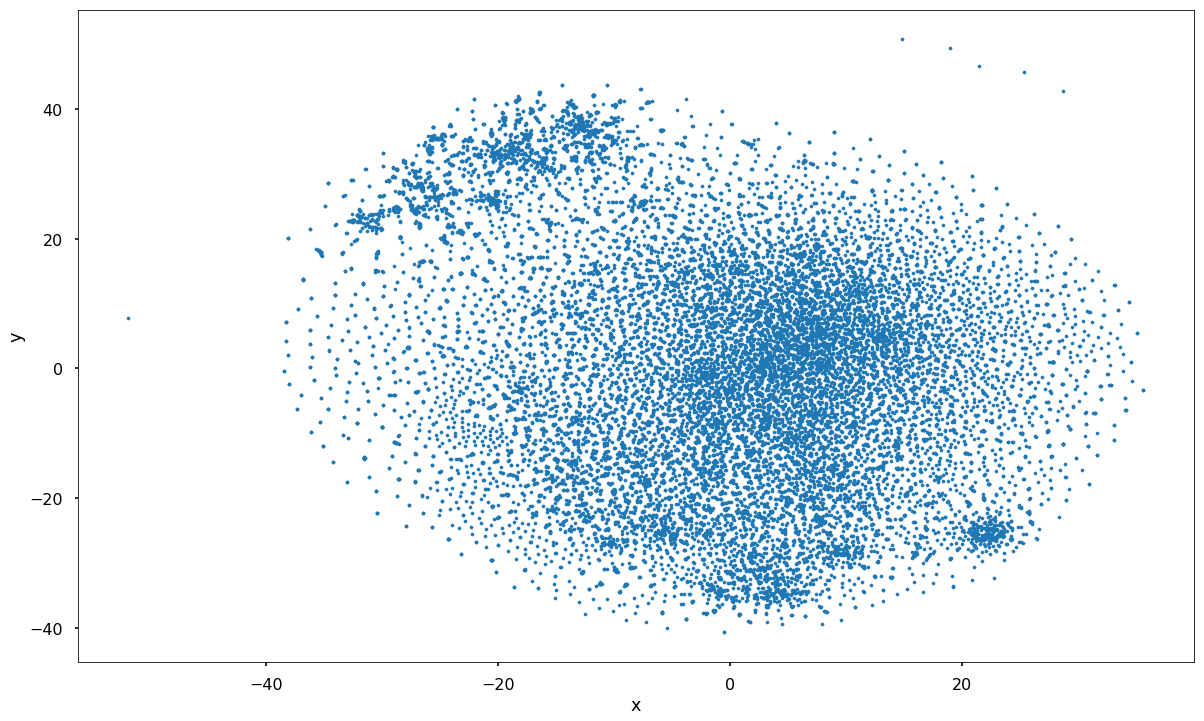

In [29]:
points.plot.scatter("x", "y", s = 10, figsize=(20, 12))

In [40]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
#     print(x_bounds[0] <= points.x)
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    plt.axis([x_bounds[0], x_bounds[1], y_bounds[0], y_bounds[1]])
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

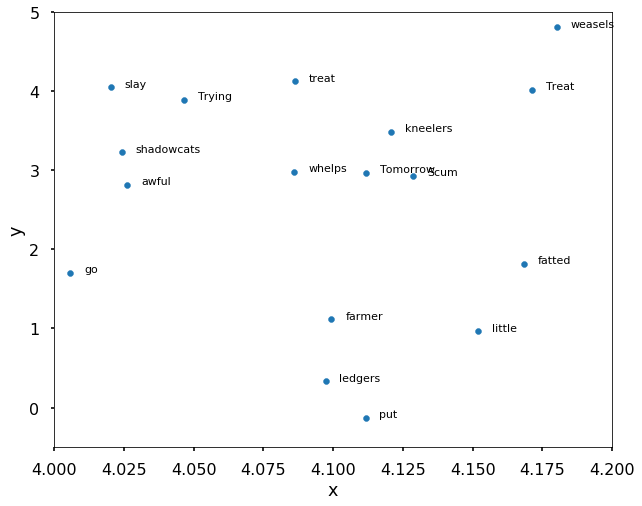

In [42]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, 5))

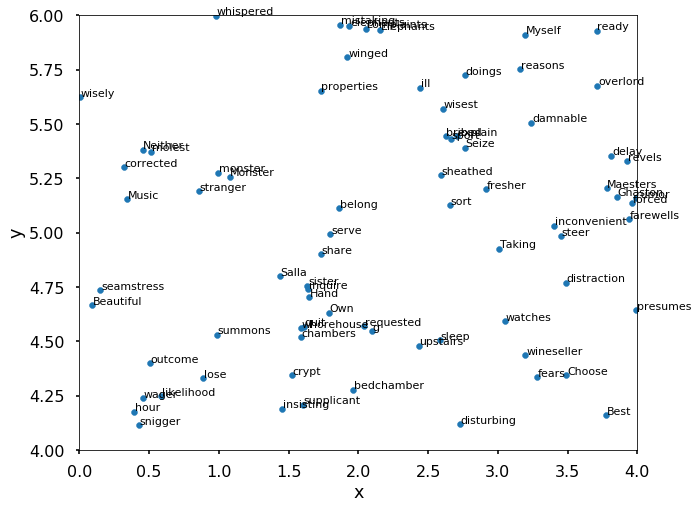

In [45]:
plot_region(x_bounds=(0, 4), y_bounds=(4, 6))

In [33]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [34]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as cup is related to wine
Arya is related to Nymeria, as Dany is related to dragons


c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'Dany'

In [52]:
thrones2vec.most_similar("Tyrion")

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Bronn', 0.3771960735321045),
 ('Cersei', 0.37696486711502075),
 ('wolfish', 0.3728376030921936),
 ('dwarf', 0.3662242293357849),
 ('Shae', 0.360944926738739),
 ('He', 0.35083067417144775),
 ('he', 0.3469667434692383),
 ('Jaime', 0.3324912190437317),
 ('Quite', 0.3318690359592438),
 ('leer', 0.3313765525817871)]

In [54]:
thrones2vec.most_similar("dragons")

c:\users\suraprak\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('hatched', 0.422330379486084),
 ('DROGON', 0.4172939658164978),
 ('Dracarys', 0.3954297602176666),
 ('VISERION', 0.3882208466529846),
 ('RHAEGAL', 0.38822001218795776),
 ('Dragons', 0.38329216837882996),
 ('wyrms', 0.36645326018333435),
 ('DRAGONS', 0.3566198945045471),
 ('Seek', 0.34937113523483276),
 ('UNBURNT', 0.337460994720459)]